In [1]:
#Importing all the stuff we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce
from scipy.stats import chi2_contingency

## Coverage analysis for scaffolds from paper

fem, male54,male55,male59

In [2]:
fem = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/FemaleSoap.txt', delimiter = ' ')
male54 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap54.txt', delimiter = ' ')
male55 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap55.txt', delimiter = ' ')
male59 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/MaleSoap59.txt', delimiter = ' ')

In [3]:
#merging all data according to the scaffold id
data_frames_paper = [fem,male54,male55,male59]
cov1 = reduce(lambda  left,right: pd.merge(left,right,on=['Scaffold'],
                                            how='outer'), data_frames_paper)
cov1

,Scaffold,Length,Fcov,Length54,Mcov54,Length55,Mcov55,Length59,Mcov59
0,JPZV02000012.1,1169662,2.4,1169662,4.3,1169662,1.9,1169662,4.0
1,JPZV02000013.1,1376873,3.7,1376873,6.4,1376873,2.7,1376873,6.4
2,JPZV02000014.1,1402747,2.0,1402747,5.1,1402747,2.5,1402747,5.2
3,JPZV02000015.1,1147640,2.0,1147640,5.3,1147640,2.5,1147640,5.4
4,JPZV02000034.1,2160120,13.0,2160120,8.2,2160120,2.9,2160120,7.9
...,...,...,...,...,...,...,...,...,...
28060,KZ622727.1,3779,2.8,3779,12.0,3779,4.8,3779,11.0
28061,KZ622728.1,4649,5.1,4649,19.0,4649,6.4,4649,17.0
28062,KZ622729.1,11495,3.9,11495,14.0,11495,5.9,11495,13.0
28063,KZ622730.1,38813,11.0,38813,32.0,38813,15.0,38813,36.0


In [4]:
## select scaffolds which length is equal or greater than 1000bp
mergecov1 =cov1.loc[(cov1['Length'] >= 1000)]
mergecov1['maleTotal'] = mergecov1['Mcov54']+mergecov1['Mcov55']+mergecov1['Mcov59']
mergecov1['m+1'] = mergecov1['maleTotal']+1
mergecov1['f+1'] = mergecov1['Fcov']+1
mergecov1['ratio'] = np.log2(mergecov1['m+1']/mergecov1['f+1'])
## Criteria to assign X/A
mergecov1['chromosome'] = np.where((mergecov1['ratio'] <(mergecov1.ratio.median()-0.5)),'X','A')
mergecov1.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov1.txt', index=False)
mergecov1

/tmp/ipykernel_3336804/2231981023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov1['maleTotal'] = mergecov1['Mcov54']+mergecov1['Mcov55']+mergecov1['Mcov59']
/tmp/ipykernel_3336804/2231981023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov1['m+1'] = mergecov1['maleTotal']+1
/tmp/ipykernel_3336804/2231981023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Scaffold,Length,Fcov,Length54,Mcov54,Length55,Mcov55,Length59,Mcov59,maleTotal,m+1,f+1,ratio,chromosome
0,JPZV02000012.1,1169662,2.4,1169662,4.3,1169662,1.9,1169662,4.0,10.2,11.2,3.4,1.719892,X
1,JPZV02000013.1,1376873,3.7,1376873,6.4,1376873,2.7,1376873,6.4,15.5,16.5,4.7,1.811733,X
2,JPZV02000014.1,1402747,2.0,1402747,5.1,1402747,2.5,1402747,5.2,12.8,13.8,3.0,2.201634,A
3,JPZV02000015.1,1147640,2.0,1147640,5.3,1147640,2.5,1147640,5.4,13.2,14.2,3.0,2.242857,A
4,JPZV02000034.1,2160120,13.0,2160120,8.2,2160120,2.9,2160120,7.9,19.0,20.0,14.0,0.514573,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28060,KZ622727.1,3779,2.8,3779,12.0,3779,4.8,3779,11.0,27.8,28.8,3.8,2.921997,A
28061,KZ622728.1,4649,5.1,4649,19.0,4649,6.4,4649,17.0,42.4,43.4,6.1,2.830814,A
28062,KZ622729.1,11495,3.9,11495,14.0,11495,5.9,11495,13.0,32.9,33.9,4.9,2.790432,A
28063,KZ622730.1,38813,11.0,38813,32.0,38813,15.0,38813,36.0,83.0,84.0,12.0,2.807355,A


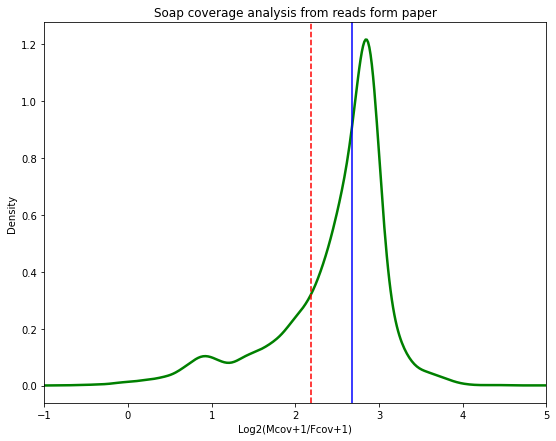

In [5]:
## density plot 
plt.figure(figsize=(9,7))
mergecov1.ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis from reads form paper')
plt.xlim([-1, 5])
plt.axvline(mergecov1.ratio.median(),color='blue')
plt.axvline(mergecov1.ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()

## Coverage analysis with other reads (cucarachas)
femc, fem66,fem67,fem68,male63,mal64

In [6]:
femc = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap.txt', delimiter = ' ')
male63 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/MaleSoap63.txt', delimiter = ' ')
male64 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/MaleSoap64.txt', delimiter = ' ')
fem66 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap66.txt', delimiter = ' ')
fem67 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap67.txt', delimiter = ' ')
fem68 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/reads/cucarachas/FemaleSoap68.txt', delimiter = ' ')

In [7]:
## merging all coverages according to scaffolds
data_frames = [femc,fem66,fem67,fem68, male63, male64]
sq = reduce(lambda  left,right: pd.merge(left,right,on=['Scaffold'],
                                            how='outer'), data_frames)

cov2 = sq[['Scaffold','Length','Fcov65','Fcov66','Fcov67','Fcov68','Mcov63','Mcov64']]
print(cov2)
len(cov2.index)

             Scaffold   Length  Fcov65  Fcov66  Fcov67  Fcov68  Mcov63  Mcov64
0      JPZV02000012.1  1169662     1.0     1.1     NaN     NaN     1.5     NaN
1      JPZV02000013.1  1376873     1.0     1.1     1.0     NaN     1.1     NaN
2      JPZV02000014.1  1402747     2.0     NaN     NaN     NaN     NaN     1.0
3      JPZV02000015.1  1147640     1.0     NaN     NaN     NaN     NaN     NaN
4      JPZV02000034.1  2160120     NaN     NaN     NaN     NaN     1.0     NaN
...               ...      ...     ...     ...     ...     ...     ...     ...
28060      KZ622727.1     3779    11.0     7.7    12.0    12.0    12.0     7.1
28061      KZ622728.1     4649    18.0    15.0    22.0    20.0    17.0    12.0
28062      KZ622729.1    11495    17.0     8.0     9.1     6.9     8.7     5.3
28063      KZ622730.1    38813    26.0    23.0    28.0    30.0    30.0    22.0
28064      KZ622731.1    17090    35.0    21.0    25.0    37.0    34.0    29.0

[28065 rows x 8 columns]


28065

In [8]:
#Picking data whose length is equal or greater than 1000bp
mergecov2 =cov2.loc[(cov2['Length'] >= 1000)]
#mergec.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergec_new_dataset_coverage.txt', index=False)
print(mergecov2)

             Scaffold   Length  Fcov65  Fcov66  Fcov67  Fcov68  Mcov63  Mcov64
0      JPZV02000012.1  1169662     1.0     1.1     NaN     NaN     1.5     NaN
1      JPZV02000013.1  1376873     1.0     1.1     1.0     NaN     1.1     NaN
2      JPZV02000014.1  1402747     2.0     NaN     NaN     NaN     NaN     1.0
3      JPZV02000015.1  1147640     1.0     NaN     NaN     NaN     NaN     NaN
4      JPZV02000034.1  2160120     NaN     NaN     NaN     NaN     1.0     NaN
...               ...      ...     ...     ...     ...     ...     ...     ...
28060      KZ622727.1     3779    11.0     7.7    12.0    12.0    12.0     7.1
28061      KZ622728.1     4649    18.0    15.0    22.0    20.0    17.0    12.0
28062      KZ622729.1    11495    17.0     8.0     9.1     6.9     8.7     5.3
28063      KZ622730.1    38813    26.0    23.0    28.0    30.0    30.0    22.0
28064      KZ622731.1    17090    35.0    21.0    25.0    37.0    34.0    29.0

[17654 rows x 8 columns]


In [9]:
#Replacing the NaN with zero.
mergecov2['Fcov66'] = mergecov2['Fcov66'].fillna(0)
mergecov2['Fcov67'] = mergecov2['Fcov67'].fillna(0)
mergecov2['Fcov68'] = mergecov2['Fcov68'].fillna(0)
mergecov2['Fcov65'] = mergecov2['Fcov65'].fillna(0)
mergecov2['Mcov63'] = mergecov2['Mcov63'].fillna(0)
mergecov2['Mcov64'] = mergecov2['Mcov64'].fillna(0)
#mergec.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergec_new_dataset_coverage.txt', index=False)
mergecov2.head(5)

/tmp/ipykernel_3336804/188468046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov2['Fcov66'] = mergecov2['Fcov66'].fillna(0)
/tmp/ipykernel_3336804/188468046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov2['Fcov67'] = mergecov2['Fcov67'].fillna(0)
/tmp/ipykernel_3336804/188468046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Scaffold,Length,Fcov65,Fcov66,Fcov67,Fcov68,Mcov63,Mcov64
0,JPZV02000012.1,1169662,1.0,1.1,0.0,0.0,1.5,0.0
1,JPZV02000013.1,1376873,1.0,1.1,1.0,0.0,1.1,0.0
2,JPZV02000014.1,1402747,2.0,0.0,0.0,0.0,0.0,1.0
3,JPZV02000015.1,1147640,1.0,0.0,0.0,0.0,0.0,0.0
4,JPZV02000034.1,2160120,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
mergecov2['femTotal'] = mergecov2['Fcov68']+mergecov2['Fcov65']+mergecov2['Fcov67']+mergecov2['Fcov66']
mergecov2['maleTotal'] = mergecov2['Mcov64']+mergecov2['Mcov64']
mergecov2['m+1'] = mergecov2['maleTotal']+1
mergecov2['f+1'] = mergecov2['femTotal']+1
mergecov2['log2m+1'] = np.log2(mergecov2['maleTotal']+1)
mergecov2['log2f+1'] = np.log2(mergecov2['femTotal']+1)
mergecov2['ratio'] = np.log2(mergecov2['m+1']/mergecov2['f+1'])
mergecov2.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov2.txt', index=False)
## Criteria for assign X/A
mergecov2['chromosome'] = np.where((mergecov2['ratio'] <(mergecov2.ratio.median()-0.5)),'X','A')

mergecov2

/tmp/ipykernel_3336804/4025459825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov2['femTotal'] = mergecov2['Fcov68']+mergecov2['Fcov65']+mergecov2['Fcov67']+mergecov2['Fcov66']
/tmp/ipykernel_3336804/4025459825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergecov2['maleTotal'] = mergecov2['Mcov64']+mergecov2['Mcov64']
/tmp/ipykernel_3336804/4025459825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Scaffold,Length,Fcov65,Fcov66,Fcov67,Fcov68,Mcov63,Mcov64,femTotal,maleTotal,m+1,f+1,log2m+1,log2f+1,ratio,chromosome
0,JPZV02000012.1,1169662,1.0,1.1,0.0,0.0,1.5,0.0,2.1,0.0,1.0,3.1,0.000000,1.632268,-1.632268,A
1,JPZV02000013.1,1376873,1.0,1.1,1.0,0.0,1.1,0.0,3.1,0.0,1.0,4.1,0.000000,2.035624,-2.035624,X
2,JPZV02000014.1,1402747,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,1.584963,1.584963,0.000000,A
3,JPZV02000015.1,1147640,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,1.000000,-1.000000,A
4,JPZV02000034.1,2160120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28060,KZ622727.1,3779,11.0,7.7,12.0,12.0,12.0,7.1,42.7,14.2,15.2,43.7,3.925999,5.449561,-1.523562,A
28061,KZ622728.1,4649,18.0,15.0,22.0,20.0,17.0,12.0,75.0,24.0,25.0,76.0,4.643856,6.247928,-1.604071,A
28062,KZ622729.1,11495,17.0,8.0,9.1,6.9,8.7,5.3,41.0,10.6,11.6,42.0,3.536053,5.392317,-1.856265,X
28063,KZ622730.1,38813,26.0,23.0,28.0,30.0,30.0,22.0,107.0,44.0,45.0,108.0,5.491853,6.754888,-1.263034,A


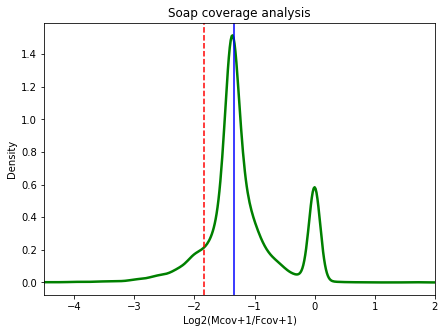

In [11]:
#Density plot considering scaffolds > 1000bp
plt.figure(figsize=(7,5))
mergecov2.ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis')
plt.xlim([-4.5, 2])
plt.axvline(mergecov2.ratio.median(),color='blue')
plt.axvline(mergecov2.ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()


## Coverage analysis with correct labeled individuals
- From reads form paper: mcov54,mcov55,mcov54, fcov
- From new reads: mcov63,mcov64

In [14]:
lp1 = cov2.merge(cov1, on = 'Scaffold')
lp1['Mcov63'] = lp1['Mcov63'].fillna(0)
lp1['Mcov64'] = lp1['Mcov64'].fillna(0)
lp2 = lp1[['Scaffold','Length_x','Fcov','Mcov63','Mcov64','Mcov54','Mcov55','Mcov59']]     
lp2['Mcov_total'] = lp2['Mcov63']+lp2['Mcov64']+lp2['Mcov54']+lp2['Mcov55']+lp2['Mcov59']
lp2['log_ratio'] = np.log2(lp2['Mcov_total']/lp2['Fcov'])
combData =lp2.loc[(lp2['Length_x'] >= 1000)] 

## Criteria for assign X/A
combData['chromosome_bla'] = np.where((combData['log_ratio'] <(combData.log_ratio.median()-0.5)),'X','A')
combData.to_csv('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/paper/coverageBlatella.txt', index=False)
combData


/tmp/ipykernel_3336804/2048989831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp2['Mcov_total'] = lp2['Mcov63']+lp2['Mcov64']+lp2['Mcov54']+lp2['Mcov55']+lp2['Mcov59']
/tmp/ipykernel_3336804/2048989831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp2['log_ratio'] = np.log2(lp2['Mcov_total']/lp2['Fcov'])
/tmp/ipykernel_3336804/2048989831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Scaffold,Length_x,Fcov,Mcov63,Mcov64,Mcov54,Mcov55,Mcov59,Mcov_total,log_ratio,chromosome_bla
0,JPZV02000012.1,1169662,2.4,1.5,0.0,4.3,1.9,4.0,11.7,2.285402,X
1,JPZV02000013.1,1376873,3.7,1.1,0.0,6.4,2.7,6.4,16.6,2.165586,X
2,JPZV02000014.1,1402747,2.0,0.0,1.0,5.1,2.5,5.2,13.8,2.786596,X
3,JPZV02000015.1,1147640,2.0,0.0,0.0,5.3,2.5,5.4,13.2,2.722466,X
4,JPZV02000034.1,2160120,13.0,1.0,0.0,8.2,2.9,7.9,20.0,0.621488,X
...,...,...,...,...,...,...,...,...,...,...,...
28060,KZ622727.1,3779,2.8,12.0,7.1,12.0,4.8,11.0,46.9,4.066089,A
28061,KZ622728.1,4649,5.1,17.0,12.0,19.0,6.4,17.0,71.4,3.807355,A
28062,KZ622729.1,11495,3.9,8.7,5.3,14.0,5.9,13.0,46.9,3.588042,A
28063,KZ622730.1,38813,11.0,30.0,22.0,32.0,15.0,36.0,135.0,3.617384,A


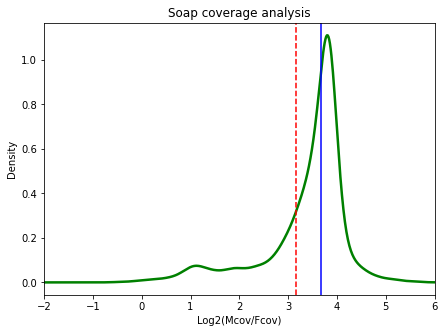

In [13]:
#Density plot considering scaffolds > 1000bp
plt.figure(figsize=(7,5))
combData.log_ratio.plot.density(color='green', linewidth=2.5)
plt.title('Soap coverage analysis')
plt.xlim([-2, 6])
plt.axvline(combData.log_ratio.median(),color='blue')
plt.axvline(combData.log_ratio.median() - 0.5,color='red', linestyle='dashed')
#plt.axvline(-0.9 + filteredLength.ratio.median(),color='green')
plt.xlabel('Log2(Mcov/Fcov)')
#For pdf format:
#plt.savefig('densityPlot.pdf')
#pdftoppm -png -r 300 densityPlot.pdf coverageDensityPlot
#plt.savefig('cucarachasDensity12.png', dpi=300)
plt.show()